<a href="https://colab.research.google.com/github/ROKR7381/DEMO_PURPOSE/blob/main/Tourist_forecasting_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Tourist Number Dataset.csv')
df

,Date,TouristNumber
0,01-01-1992,8414
1,01-02-1992,9767
2,01-03-1992,13805
3,01-04-1992,12987
4,01-05-1992,32190
...,...,...
283,01-08-2015,82593
284,01-09-2015,53472
285,01-10-2015,30361
286,01-11-2015,25436


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           288 non-null    object
 1   TouristNumber  288 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           288 non-null    datetime64[ns]
 1   TouristNumber  288 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.6 KB


Date column converted into datetime format

In [11]:
df.set_index('Date',inplace = True)
df.head()

,TouristNumber
Date,
1992-01-01,8414
1992-01-02,9767
1992-01-03,13805
1992-01-04,12987
1992-01-05,32190


<Axes: xlabel='Date', ylabel='TouristNumber'>

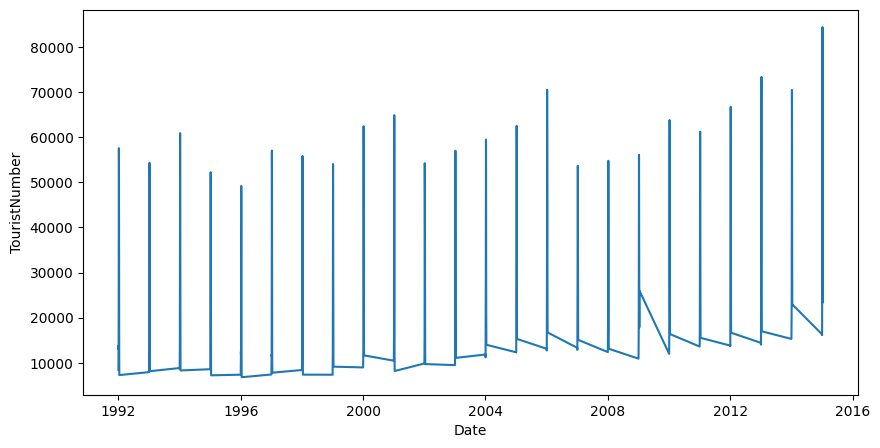

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,x=df.index,y =df['TouristNumber'] )

In [17]:
df['rollMean'] = df.TouristNumber.rolling(window=12).mean()
df['rollStd'] = df.TouristNumber.rolling(window=12).std()

<Axes: xlabel='Date', ylabel='TouristNumber'>

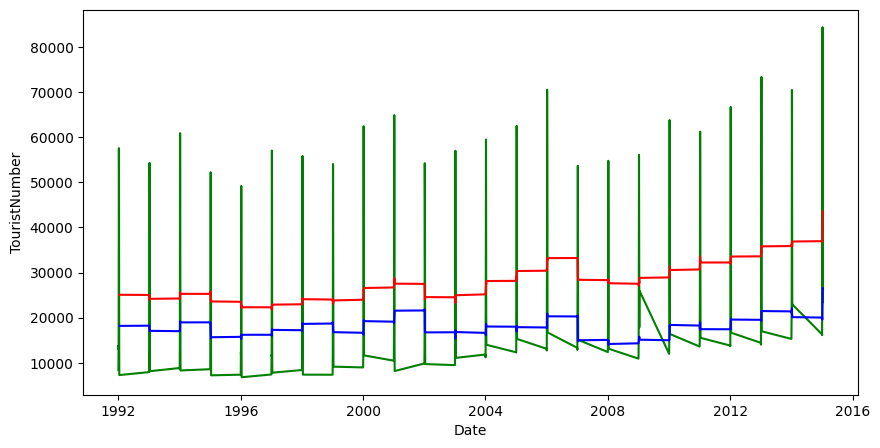

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,x=df.index,y=df.TouristNumber,color='green')
sns.lineplot(data = df,x=df.index,y=df.rollMean,color='red')
sns.lineplot(data = df,x=df.index,y=df.rollStd,color='blue')


In [21]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df['TouristNumber'],autolag='AIC')
adftest


(1.2474703429336185,
 0.9962979950836333,
 13,
 274,
 {'1%': -3.4544435065994437,
  '5%': -2.8721468827772774,
  '10%': -2.572422013959188},
 5296.976418993501)

In [24]:
stats = pd.Series(adftest[0:4],index=['Test Satas','p-value','#lags','Number of observations used'])
stats

Test Satas                       1.247470
p-value                          0.996298
#lags                           13.000000
Number of observations used    274.000000
dtype: float64

In [25]:
for key, values in adftest[4].items():
  print('criticality',key,":",values)


criticality 1% : -3.4544435065994437
criticality 5% : -2.8721468827772774
criticality 10% : -2.572422013959188


As test stats is greater than critical value data is not stationary.

In [26]:
def test_stationarity(data,var):
  data['rollMean'] = data[var].rolling(window=12).mean()
  data['rollStd'] = data[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  adfTest = adfuller(data[var],autolag='AIC')
  stats = pd.Series(adfTest[0:4],index=['Test Satas','p-value','#lags','Number of observations used'])
  print(stats)


  for key, values in adfTest[4].items():
    print('criticality',key,":",values)

  sns.lineplot(data = data,x = data.index,y = var)
  sns.lineplot(data = data,x = data.index,y = 'rollMean')
  sns.lineplot(data = data,x = data.index,y = 'rollStd')


In [28]:
df.head()

,TouristNumber,rollMean,rollStd
Date,,,
1992-01-01,8414,NaN,NaN
1992-01-02,9767,NaN,NaN
1992-01-03,13805,NaN,NaN
1992-01-04,12987,NaN,NaN
1992-01-05,32190,NaN,NaN


Test Satas                       1.247470
p-value                          0.996298
#lags                           13.000000
Number of observations used    274.000000
dtype: float64
criticality 1% : -3.4544435065994437
criticality 5% : -2.8721468827772774
criticality 10% : -2.572422013959188


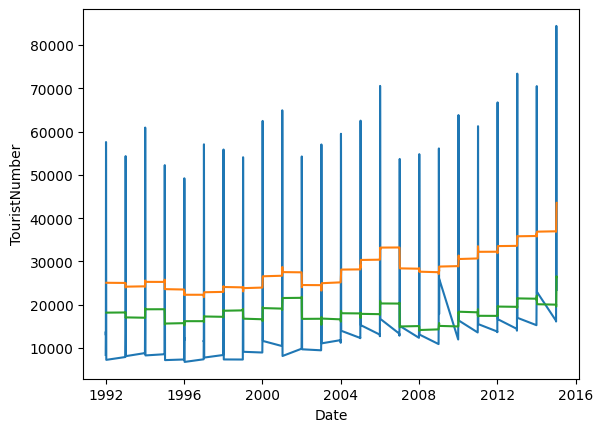

In [29]:
test_stationarity(df,'TouristNumber')

In [30]:
df1 = df[['TouristNumber']]
df1.head()

,TouristNumber
Date,
1992-01-01,8414
1992-01-02,9767
1992-01-03,13805
1992-01-04,12987
1992-01-05,32190


In [33]:
#time shift

df1['shift'] = df1.TouristNumber.shift()
df1['shiftdiff'] = df1['TouristNumber'] - df1['shift']
df1.head()

,TouristNumber,shift,shiftdiff
Date,,,
1992-01-01,8414,NaN,NaN
1992-01-02,9767,8414.0,1353.0
1992-01-03,13805,9767.0,4038.0
1992-01-04,12987,13805.0,-818.0
1992-01-05,32190,12987.0,19203.0


Test Satas                    -8.170180e+00
p-value                        8.665018e-13
#lags                          1.200000e+01
Number of observations used    2.740000e+02
dtype: float64
criticality 1% : -3.4544435065994437
criticality 5% : -2.8721468827772774
criticality 10% : -2.572422013959188


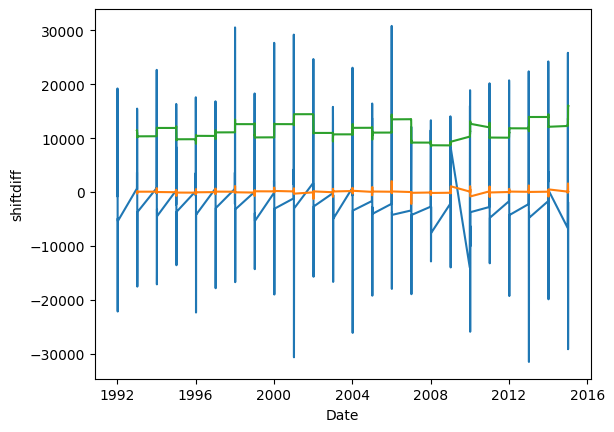

In [35]:
test_stationarity(df1.dropna(),'shiftdiff')

In [37]:
log_df = df[['TouristNumber']]
log_df['log'] = np.log(log_df['TouristNumber'])
log_df.head()

,TouristNumber,log
Date,,
1992-01-01,8414,9.037652
1992-01-02,9767,9.186765
1992-01-03,13805,9.532786
1992-01-04,12987,9.471704
1992-01-05,32190,10.379411


Test Satas                       0.418162
p-value                          0.982162
#lags                           14.000000
Number of observations used    273.000000
dtype: float64
criticality 1% : -3.45453261164607
criticality 5% : -2.8721859575020017
criticality 10% : -2.572442854861866


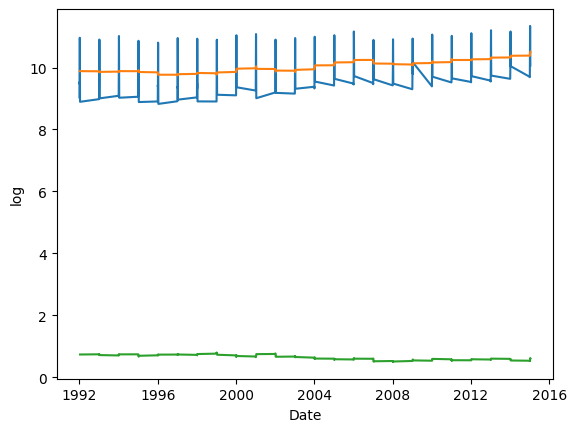

In [39]:
test_stationarity(log_df,'log')

In [40]:
sqrt_df = df[['TouristNumber']]
sqrt_df['sqrt'] = np.sqrt(df['TouristNumber'])
sqrt_df.head()

,TouristNumber,sqrt
Date,,
1992-01-01,8414,91.727858
1992-01-02,9767,98.828134
1992-01-03,13805,117.494681
1992-01-04,12987,113.960519
1992-01-05,32190,179.415718


Test Satas                       1.159261
p-value                          0.995692
#lags                           13.000000
Number of observations used    274.000000
dtype: float64
criticality 1% : -3.4544435065994437
criticality 5% : -2.8721468827772774
criticality 10% : -2.572422013959188


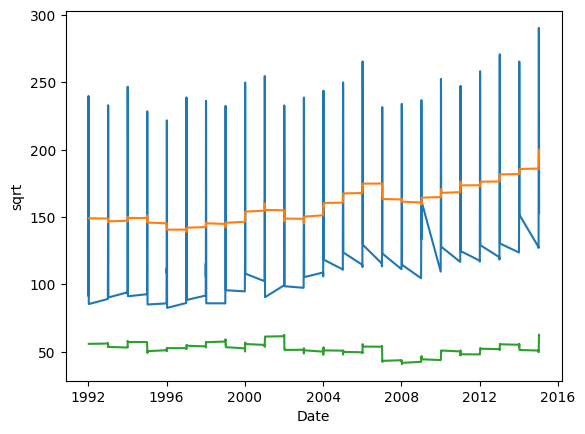

In [41]:
test_stationarity(sqrt_df,'sqrt')

In [44]:
log_df2 = log_df[['TouristNumber','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

,TouristNumber,log,log_sqrt,logShiftDiff
Date,,,,
1992-01-01,8414,9.037652,3.006269,NaN
1992-01-02,9767,9.186765,3.030968,0.024699
1992-01-03,13805,9.532786,3.087521,0.056553
1992-01-04,12987,9.471704,3.077613,-0.009908
1992-01-05,32190,10.379411,3.221709,0.144096


Test Satas                    -6.200731e+00
p-value                        5.816008e-08
#lags                          1.300000e+01
Number of observations used    2.730000e+02
dtype: float64
criticality 1% : -3.45453261164607
criticality 5% : -2.8721859575020017
criticality 10% : -2.572442854861866


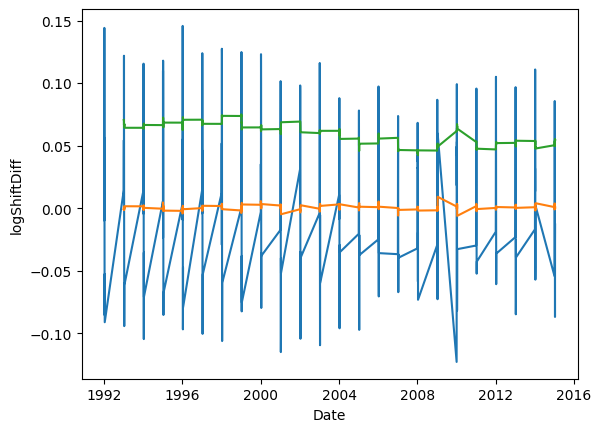

In [45]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [46]:
df3 = df[['TouristNumber']].copy(deep=True)
df3['firstDiff'] = df3['TouristNumber'].diff()
df3['Diff12'] = df3['TouristNumber'].diff(12)
df3.head()

,TouristNumber,firstDiff,Diff12
Date,,,
1992-01-01,8414,NaN,NaN
1992-01-02,9767,1353.0,NaN
1992-01-03,13805,4038.0,NaN
1992-01-04,12987,-818.0,NaN
1992-01-05,32190,19203.0,NaN


In [58]:
#Applying Arima Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

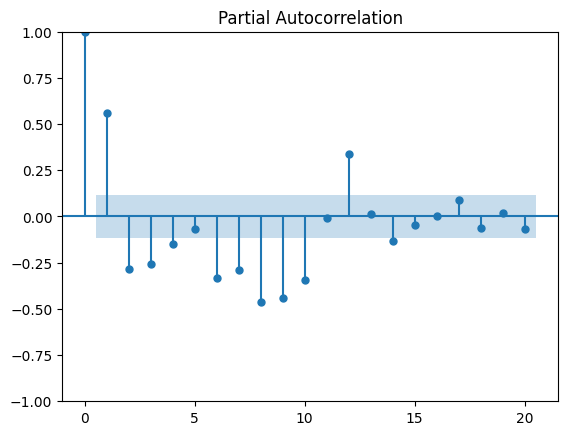

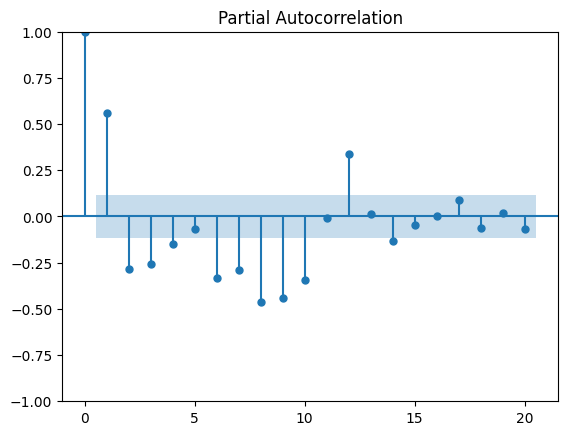

In [50]:
plot_pacf(df3['firstDiff'].dropna(),lags=20)

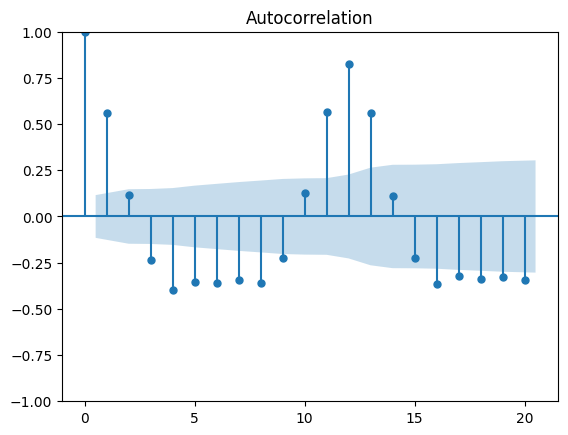

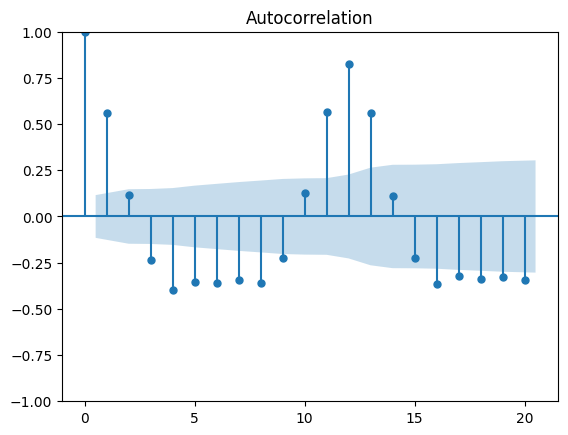

In [51]:
plot_acf(df3['firstDiff'].dropna(),lags=20)

In [80]:
train = df3[:round(len(df3)*70/100)]
test = df3[:round(len(df3)*70/100)]
test.tail()

,TouristNumber,firstDiff,Diff12,arimaPred
Date,,,,
2008-01-06,41465,8924.0,-2689.0,NaN
2008-01-07,54774,13309.0,1107.0,NaN
2008-01-08,46913,-7861.0,-6402.0,NaN
2008-01-09,34062,-12851.0,-332.0,NaN
2008-01-10,23399,-10663.0,-999.0,NaN


## **MODEL FORECASTING ARIMA MODEL**

In [81]:
import statsmodels.api as sm

In [82]:
model = sm.tsa.arima.ARIMA(train['TouristNumber'], order=(1,1,2))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
df3['arimaPred'] = prediction
df3.head()

,TouristNumber,firstDiff,Diff12,arimaPred
Date,,,,
1992-01-01,8414,NaN,NaN,0.000000
1992-01-02,9767,1353.0,NaN,13495.057895
1992-01-03,13805,4038.0,NaN,9280.511152
1992-01-04,12987,-818.0,NaN,15655.865060
1992-01-05,32190,19203.0,NaN,12825.517686


<Axes: xlabel='Date', ylabel='TouristNumber'>

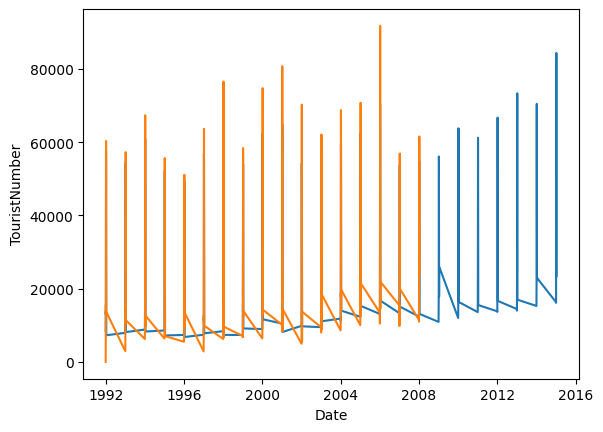

In [83]:
df3.dropna()
sns.lineplot(data = df3,x = df3.index,y = 'TouristNumber')
sns.lineplot(data = df3,x = df3.index,y = 'arimaPred')

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

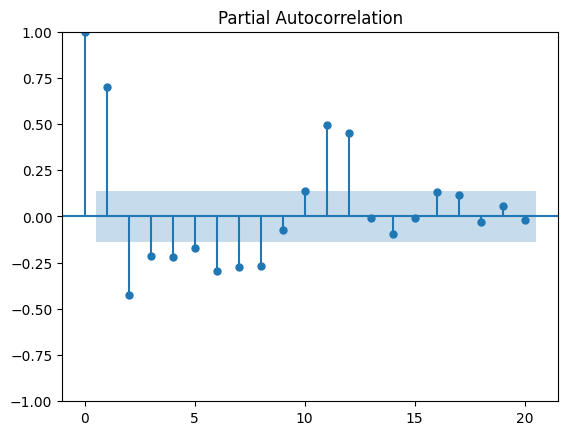

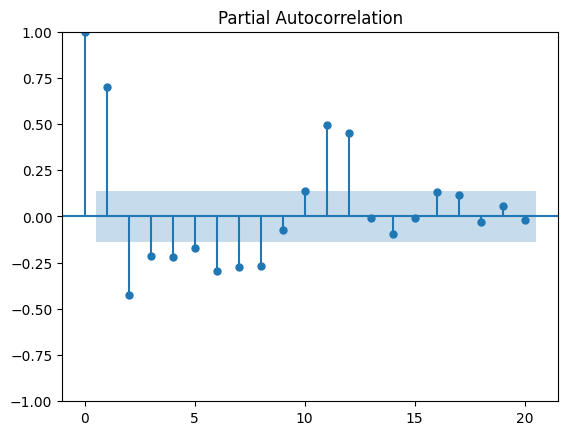

In [85]:
plot_pacf(df3['arimaPred'].dropna(),lags=20)

# **CHECKING SEASONALITY BY SARIMAX**

In [88]:
model = sm.tsa.statespace.SARIMAX(train['TouristNumber'], order=(1,1,2),seasonal_order = (1,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
df3['sarimaxPred'] = prediction
df3.head()

,TouristNumber,firstDiff,Diff12,arimaPred,sarimaxPred
Date,,,,,
1992-01-01,8414,NaN,NaN,0.000000,0.000000
1992-01-02,9767,1353.0,NaN,13495.057895,6488.439797
1992-01-03,13805,4038.0,NaN,9280.511152,7779.062440
1992-01-04,12987,-818.0,NaN,15655.865060,11083.940650
1992-01-05,32190,19203.0,NaN,12825.517686,11101.215488


<Axes: xlabel='Date', ylabel='TouristNumber'>

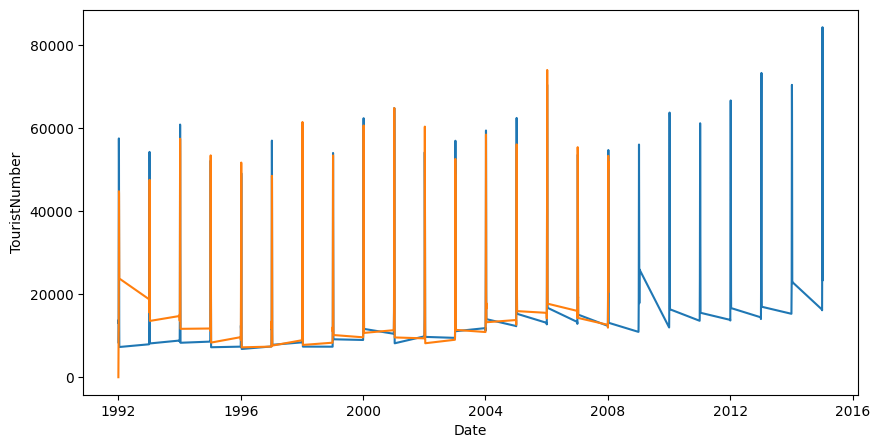

In [91]:
df3.dropna()
plt.figure(figsize=(10,5))
sns.lineplot(data=df3,x = df3.index,y='TouristNumber')
sns.lineplot(data=df3,x = df3.index,y='sarimaxPred')

In [92]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['TouristNumber'],prediction))

5171.153596249894

<Axes: xlabel='Date', ylabel='TouristNumber'>

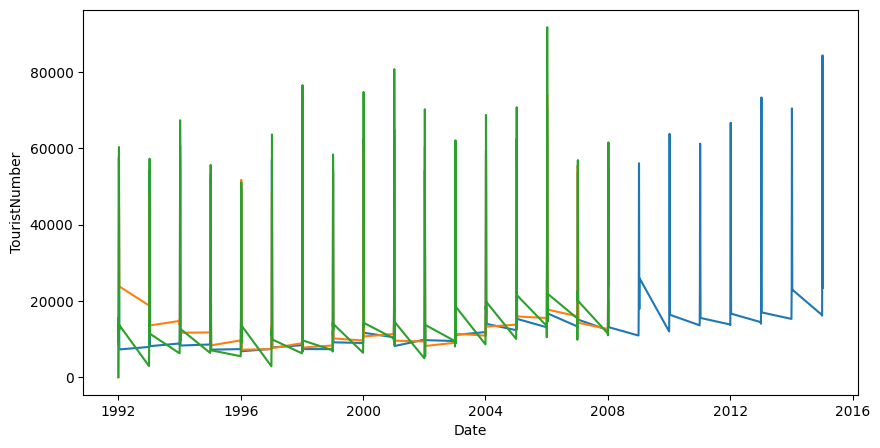

In [93]:
df3.dropna()
plt.figure(figsize=(10,5))
sns.lineplot(data=df3,x = df3.index,y='TouristNumber')
sns.lineplot(data=df3,x = df3.index,y='sarimaxPred')
sns.lineplot(data=df3,x = df3.index,y='arimaPred')